201812 2018 evaluation vs GRL dataset

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob

import seawater
""

import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

# import salishsea_tools
# from salishsea_tools import (
#     nc_tools,
#     viz_tools,
#     geo_tools,
#     tidetools
# )

# %matplotlib inline


## example 5 

In [11]:

# '''
# How to create a Taylor diagram with a legend plus suppressed axes titles
# A fifth example of how to create a Taylor diagram given one set of
# reference observations and multiple model predictions for the quantity.
# This example is a variation on the fourth example (taylor4) where now a
# legend is added, and axes titles are suppressed. Note that symbols are
# used for the points when requesting a legend.
# All functions in the Skill Metrics library are designed to only work with
# one-dimensional arrays, e.g. time series of observations at a selected
# location. The one-dimensional data are read in as dictionaries via a 
# pickle file: ref['data'], pred1['data'], pred2['data'], 
# and pred3['data']. The plot is written to a file in Portable Network 
# Graphics (PNG) format.
# The reference data used in this example are cell concentrations of a
# phytoplankton collected from cruise surveys at selected locations and 
# time. The model predictions are from three different simulations that
# have been space-time interpolated to the location and time of the sample
# collection. Details on the contents of the dictionary (once loaded) can 
# be obtained by simply executing the following two statements
# >> key_to_value_lengths = {k:len(v) for k, v in ref.items()}
# >> print key_to_value_lengths
# {'units': 6, 'longitude': 57, 'jday': 57, 'date': 57, 'depth': 57, 
# 'station': 57, 'time': 57, 'latitude': 57, 'data': 57}
# Author: Peter A. Rochford
#         Symplectic, LLC
#         www.thesymplectic.com
# Created on Dec 6, 2016
# @author: prochford@thesymplectic.com
# '''

# import matplotlib.pyplot as plt
# import numpy as np
# import pickle
# import skill_metrics as sm
# from sys import version_info

# def load_obj(name):
#     # Load object from file in pickle format
#     if version_info[0] == 2:
#         suffix = 'pkl'
#     else:
#         suffix = 'pkl3'

#     with open(name + '.' + suffix, 'rb') as f:
#         return pickle.load(f) # Python2 succeeds

# class Container(object): 
    
#     def __init__(self, pred1, pred2, pred3, ref):
#         self.pred1 = pred1
#         self.pred2 = pred2
#         self.pred3 = pred3
#         self.ref = ref
        
# if __name__ == '__main__':
    
#     # Close any previously open graphics windows
#     # ToDo: fails to work within Eclipse
#     plt.close('all')
        
#     # Read data from pickle file
#     data = load_obj('taylor_data')

#     # Calculate statistics for Taylor diagram
#     # The first array element (e.g. taylor_stats1[0]) corresponds to the 
#     # reference series while the second and subsequent elements
#     # (e.g. taylor_stats1[1:]) are those for the predicted series.
#     taylor_stats1 = sm.taylor_statistics(data.pred1,data.ref,'data')
#     taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
#     taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')
    
#     # Store statistics in arrays
#     sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
#                      taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
#     crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
#                       taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
#     ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
#                       taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

#     # Specify labels for points in a cell array (M1 for model prediction 1,
#     # etc.). Note that a label needs to be specified for the reference even
#     # though it is not used.
#     label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']
    
#     '''
#     Produce the Taylor diagram
#     Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
#     Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
#     labels (counter-clockwise from x-axis). Exchange color and line style
#     choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
#     the line width of all lines. Suppress axes titles and add a legend.
#     For an exhaustive list of options to customize your diagram, 
#     please call the function at a Python command line:
#     >> taylor_diagram
#     '''
#     sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
#                       markerLabelColor = 'r', 
#                       markerColor = 'r', markerLegend = 'on', 
#                       tickRMS = range(0,60,10), tickRMSangle = 110.0,
#                       colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
#                       titleRMS = 'on', tickSTD = range(0,80,20), 
#                       axismax = 60.0, colSTD = 'b', styleSTD = '-.', 
#                       widthSTD = 1.0, titleSTD = 'on', 
#                       colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
#                       titleCOR = 'on')

#     # Write plot to file

#     #plt.savefig('taylor5.png')

#     # Show plot
#     plt.show()


# load Ianson et al obs. dataset

In [12]:
infil = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_nu.txt')
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
TA_conv=alk*dens/1000

S_rs = S * 35.16504/35



In [13]:
##changeable variables
scrdir = '../KEY_MODEVAL/MODEL_EVAL_scripts/'

DIC13 = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_2013.nc')
TA13 = nc.Dataset(scrdir+'/TA_hindcast201905_GRL_comp_2013.nc')

DIC_mod13 = DIC13['model_output']['mod_point'][:]
is_ref = DIC13['model_output']['mod_x'][:]
js_ref = DIC13['model_output']['mod_y'][:]

TA_mod13 = TA13['model_output']['mod_point'][:]
is_ref2 = TA13['model_output']['mod_x'][:]
js_ref2 = TA13['model_output']['mod_y'][:]

DIC_mod13[DIC_mod13==0]=np.nan
#DIC,sal,TA
dic_compbl = dic_conv[~(np.isnan(DIC_mod13))]
DIC_mod13_compbl = DIC_mod13[~(np.isnan(DIC_mod13))]
TA_compbl = TA_conv[~(np.isnan(DIC_mod13))]
TA_mod13_compbl = TA_mod13[~(np.isnan(DIC_mod13))]

#
DIC14 = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_2014.nc')
TA14 = nc.Dataset(scrdir+'/TA_hindcast201905_GRL_comp_2014.nc')

DIC_mod14 = DIC14['model_output']['mod_point'][:]
is_ref = DIC14['model_output']['mod_x'][:]
js_ref = DIC14['model_output']['mod_y'][:]

TA_mod14 = TA14['model_output']['mod_point'][:]
is_ref2 = TA14['model_output']['mod_x'][:]
js_ref2 = TA14['model_output']['mod_y'][:]

DIC_mod14[DIC_mod14==0]=np.nan
#DIC,sal,TA
dic_compbl = dic_conv[~(np.isnan(DIC_mod14))]
DIC_mod14_compbl = DIC_mod14[~(np.isnan(DIC_mod14))]
TA_compbl = TA_conv[~(np.isnan(DIC_mod14))]
TA_mod14_compbl = TA_mod14[~(np.isnan(DIC_mod14))]

##changeable variables
DIC15 = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_2015.nc')
TA15 = nc.Dataset(scrdir+'/TA_hindcast201905_GRL_comp_2015.nc')

DIC_mod15 = DIC15['model_output']['mod_point'][:]
is_ref = DIC15['model_output']['mod_x'][:]
js_ref = DIC15['model_output']['mod_y'][:]

TA_mod15 = TA15['model_output']['mod_point'][:]
is_ref2 = TA15['model_output']['mod_x'][:]
js_ref2 = TA15['model_output']['mod_y'][:]


DIC_mod15[DIC_mod15==0]=np.nan
#DIC,sal,TA
dic_compbl = dic_conv[~(np.isnan(DIC_mod15))]
DIC_mod15_compbl = DIC_mod15[~(np.isnan(DIC_mod15))]
TA_compbl = TA_conv[~(np.isnan(DIC_mod15))]
TA_mod15_compbl = TA_mod15[~(np.isnan(DIC_mod15))]

DIC16 = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_2016.nc')
TA16 = nc.Dataset(scrdir+'/TA_hindcast201905_GRL_comp_2016.nc')

DIC_mod16 = DIC16['model_output']['mod_point'][:]
is_ref = DIC16['model_output']['mod_x'][:]
js_ref = DIC16['model_output']['mod_y'][:]

TA_mod16 = TA16['model_output']['mod_point'][:]
is_ref2 = TA16['model_output']['mod_x'][:]
js_ref2 = TA16['model_output']['mod_y'][:]

DIC_mod16[DIC_mod16==0]=np.nan
#DIC,sal,TA
dic_compbl = dic_conv[~(np.isnan(DIC_mod16))]
DIC_mod16_compbl = DIC_mod16[~(np.isnan(DIC_mod16))]
TA_compbl = TA_conv[~(np.isnan(DIC_mod16))]
TA_mod16_compbl = TA_mod16[~(np.isnan(DIC_mod16))]

DIC17 = nc.Dataset(scrdir+'/DIC_hindcast201905_GRL_comp_2017.nc')
TA17 = nc.Dataset(scrdir+'/TA_hindcast201905_GRL_comp_2017.nc')

DIC_mod17 = DIC17['model_output']['mod_point'][:]
is_ref = DIC17['model_output']['mod_x'][:]
js_ref = DIC17['model_output']['mod_y'][:]

TA_mod17 = TA17['model_output']['mod_point'][:]
is_ref2 = TA17['model_output']['mod_x'][:]
js_ref2 = TA17['model_output']['mod_y'][:]

DIC_mod17[DIC_mod17==0]=np.nan
#DIC,sal,TA
dic_compbl = dic_conv[~(np.isnan(DIC_mod17))]
DIC_mod17_compbl = DIC_mod17[~(np.isnan(DIC_mod17))]
TA_compbl = TA_conv[~(np.isnan(DIC_mod17))]
TA_mod17_compbl = TA_mod17[~(np.isnan(DIC_mod17))]

## DIC Taylor Diagram

In [ ]:
target_stats1 = sm.target_statistics(data.pred1,data.ref,'data')
    target_stats2 = sm.target_statistics(data.pred2,data.ref,'data')
    target_stats3 = sm.target_statistics(data.pred3,data.ref,'data')
     
    # Store statistics in arrays
    bias = np.array([target_stats1['bias'], target_stats2['bias'], 
                     target_stats3['bias']])
    crmsd = np.array([target_stats1['crmsd'], target_stats2['crmsd'], 
                      target_stats3['crmsd']])
    rmsd = np.array([target_stats1['rmsd'], target_stats2['rmsd'], 
                     target_stats3['rmsd']])

    # Specify labels for points in a list (M1 for model prediction # 1, 
    # etc.).
    label = ['M1', 'M2', 'M3']

    '''
    Produce the target diagram
    
    Label the points and change the axis options for BIAS and CRMSD.
    
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> target_diagram
    '''
    sm.target_diagram(bias,crmsd,rmsd, markerLabel = label, \
                      ticks=np.arange(-50,60,10))

    # Write plot to file
    plt.savefig('target2.png')

    # Show plot
    plt.show()

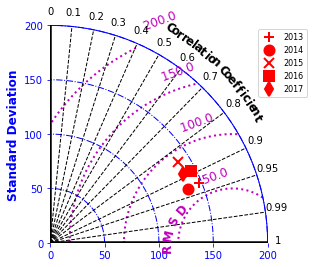

In [14]:
taylor_statsDIC13 = sm.taylor_statistics(DIC_mod13_compbl,dic_compbl,'data')
taylor_statsDIC14 = sm.taylor_statistics(DIC_mod14_compbl,dic_compbl,'data')
taylor_statsDIC15 = sm.taylor_statistics(DIC_mod15_compbl,dic_compbl,'data')
taylor_statsDIC16 = sm.taylor_statistics(DIC_mod16_compbl,dic_compbl,'data')
taylor_statsDIC17 = sm.taylor_statistics(DIC_mod17_compbl,dic_compbl,'data')

# Store statistics in arrays
sdev = np.array([taylor_statsDIC13['sdev'][0],
                 taylor_statsDIC13['sdev'][1],
                 taylor_statsDIC14['sdev'][1],
                 taylor_statsDIC15['sdev'][1],
                 taylor_statsDIC16['sdev'][1],
                 taylor_statsDIC17['sdev'][1]])

crmsd = np.array([taylor_statsDIC13['crmsd'][1],
                 taylor_statsDIC13['crmsd'][1],
                 taylor_statsDIC14['crmsd'][1],
                 taylor_statsDIC15['crmsd'][1],
                 taylor_statsDIC16['crmsd'][1],
                 taylor_statsDIC17['crmsd'][1]])

ccoef = np.array([taylor_statsDIC13['ccoef'][1],
                 taylor_statsDIC13['ccoef'][1],
                 taylor_statsDIC14['ccoef'][1],
                 taylor_statsDIC15['ccoef'][1],
                 taylor_statsDIC16['ccoef'][1],
                 taylor_statsDIC17['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['nonden_obs','2013', '2014','2015','2016','2017'] #'M3']

crmsd[0] = 0
'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()


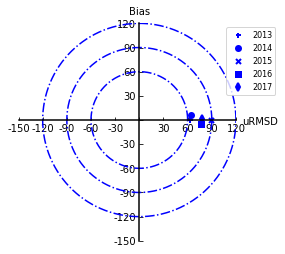

In [35]:
target_statsDIC13 = sm.target_statistics(DIC_mod13_compbl,dic_compbl,'data')
target_statsDIC14 = sm.target_statistics(DIC_mod14_compbl,dic_compbl,'data')
target_statsDIC15 = sm.target_statistics(DIC_mod15_compbl,dic_compbl,'data')
target_statsDIC16 = sm.target_statistics(DIC_mod16_compbl,dic_compbl,'data')
target_statsDIC17 = sm.target_statistics(DIC_mod17_compbl,dic_compbl,'data')


bias = np.array([target_statsDIC13['bias'],
                 target_statsDIC14['bias'],
                 target_statsDIC15['bias'],
                 target_statsDIC16['bias'],
                 target_statsDIC17['bias']])

crmsd = np.array([target_statsDIC13['crmsd'],
                 target_statsDIC14['crmsd'],
                 target_statsDIC15['crmsd'],
                 target_statsDIC16['crmsd'],
                 target_statsDIC17['crmsd']])

rmsd = np.array([target_statsDIC13['rmsd'],
                 target_statsDIC14['rmsd'],
                 target_statsDIC15['rmsd'],
                 target_statsDIC16['rmsd'],
                 target_statsDIC17['rmsd']])

label = ['2013', '2014','2015','2016','2017']

sm.target_diagram(bias,crmsd,rmsd, markerLabel = label,
                  markerLabelColor = 'b',
                  markerColor = 'b', markerSize = '5', markerLegend = 'on',
                  ticks = np.arange(-150,150,30),
                  axismax = 150.0,
                  circles = [60, 90, 120],
                  circleLineSpec = 'b-.', circleLineWidth = 1.5)

#     # Write plot to file
#     plt.savefig('target2.png')

#     # Show plot
#     plt.show()

# DIC Taylor diagram, obs >1800

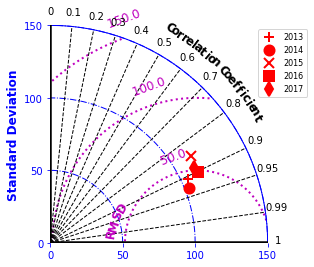

In [15]:
taylor_statsDIC13 = sm.taylor_statistics(DIC_mod13_compbl[dic_compbl>1800],dic_compbl[dic_compbl>1800],'data')
taylor_statsDIC14 = sm.taylor_statistics(DIC_mod14_compbl[dic_compbl>1800],dic_compbl[dic_compbl>1800],'data')
taylor_statsDIC15 = sm.taylor_statistics(DIC_mod15_compbl[dic_compbl>1800],dic_compbl[dic_compbl>1800],'data')
taylor_statsDIC16 = sm.taylor_statistics(DIC_mod16_compbl[dic_compbl>1800],dic_compbl[dic_compbl>1800],'data')
taylor_statsDIC17 = sm.taylor_statistics(DIC_mod17_compbl[dic_compbl>1800],dic_compbl[dic_compbl>1800],'data')

# Store statistics in arrays
sdev = np.array([taylor_statsDIC13['sdev'][0],
                 taylor_statsDIC13['sdev'][1],
                 taylor_statsDIC14['sdev'][1],
                 taylor_statsDIC15['sdev'][1],
                 taylor_statsDIC16['sdev'][1],
                 taylor_statsDIC17['sdev'][1]])

crmsd = np.array([taylor_statsDIC13['crmsd'][1],
                 taylor_statsDIC13['crmsd'][1],
                 taylor_statsDIC14['crmsd'][1],
                 taylor_statsDIC15['crmsd'][1],
                 taylor_statsDIC16['crmsd'][1],
                 taylor_statsDIC17['crmsd'][1]])

ccoef = np.array([taylor_statsDIC13['ccoef'][1],
                 taylor_statsDIC13['ccoef'][1],
                 taylor_statsDIC14['ccoef'][1],
                 taylor_statsDIC15['ccoef'][1],
                 taylor_statsDIC16['ccoef'][1],
                 taylor_statsDIC17['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['nonden_obs','2013', '2014','2015','2016','2017'] #'M3']

crmsd[0] = 0
'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()


# TA 

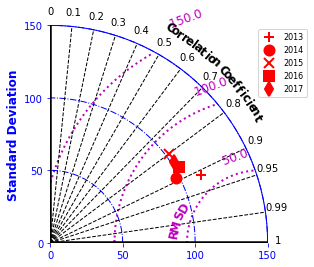

In [16]:
taylor_statsTA13 = sm.taylor_statistics(TA_mod13_compbl[~np.isnan(TA_compbl)],TA_compbl[~np.isnan(TA_compbl)],'data')
taylor_statsTA14 = sm.taylor_statistics(TA_mod14_compbl[~np.isnan(TA_compbl)],TA_compbl[~np.isnan(TA_compbl)],'data')
taylor_statsTA15 = sm.taylor_statistics(TA_mod15_compbl[~np.isnan(TA_compbl)],TA_compbl[~np.isnan(TA_compbl)],'data')
taylor_statsTA16 = sm.taylor_statistics(TA_mod16_compbl[~np.isnan(TA_compbl)],TA_compbl[~np.isnan(TA_compbl)],'data')
taylor_statsTA17 = sm.taylor_statistics(TA_mod17_compbl[~np.isnan(TA_compbl)],TA_compbl[~np.isnan(TA_compbl)],'data')

# Store statistics in arrays
sdev = np.array([taylor_statsTA13['sdev'][0],
                 taylor_statsTA13['sdev'][1],
                 taylor_statsTA14['sdev'][1],
                 taylor_statsTA15['sdev'][1],
                 taylor_statsTA16['sdev'][1],
                 taylor_statsTA17['sdev'][1]])

crmsd = np.array([taylor_statsTA13['crmsd'][1],
                 taylor_statsTA13['crmsd'][1],
                 taylor_statsTA14['crmsd'][1],
                 taylor_statsTA15['crmsd'][1],
                 taylor_statsTA16['crmsd'][1],
                 taylor_statsTA17['crmsd'][1]])

ccoef = np.array([taylor_statsTA13['ccoef'][1],
                 taylor_statsTA13['ccoef'][1],
                 taylor_statsTA14['ccoef'][1],
                 taylor_statsTA15['ccoef'][1],
                 taylor_statsTA16['ccoef'][1],
                 taylor_statsTA17['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model preTAtion 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['nonden_obs','2013', '2014','2015','2016','2017'] #'M3']

crmsd[0] = 0
'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()


# TA >1800

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


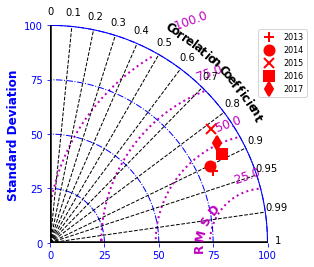

In [17]:
taylor_statsTA13 = sm.taylor_statistics(TA_mod13_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],TA_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],'data')
taylor_statsTA14 = sm.taylor_statistics(TA_mod14_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],TA_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],'data')
taylor_statsTA15 = sm.taylor_statistics(TA_mod15_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],TA_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],'data')
taylor_statsTA16 = sm.taylor_statistics(TA_mod16_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],TA_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],'data')
taylor_statsTA17 = sm.taylor_statistics(TA_mod17_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],TA_compbl[~np.isnan(TA_compbl)& (TA_compbl>1800)],'data')

# Store statistics in arrays
sdev = np.array([taylor_statsTA13['sdev'][0],
                 taylor_statsTA13['sdev'][1],
                 taylor_statsTA14['sdev'][1],
                 taylor_statsTA15['sdev'][1],
                 taylor_statsTA16['sdev'][1],
                 taylor_statsTA17['sdev'][1]])

crmsd = np.array([taylor_statsTA13['crmsd'][1],
                 taylor_statsTA13['crmsd'][1],
                 taylor_statsTA14['crmsd'][1],
                 taylor_statsTA15['crmsd'][1],
                 taylor_statsTA16['crmsd'][1],
                 taylor_statsTA17['crmsd'][1]])

ccoef = np.array([taylor_statsTA13['ccoef'][1],
                 taylor_statsTA13['ccoef'][1],
                 taylor_statsTA14['ccoef'][1],
                 taylor_statsTA15['ccoef'][1],
                 taylor_statsTA16['ccoef'][1],
                 taylor_statsTA17['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model preTAtion 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['nonden_obs','2013', '2014','2015','2016','2017'] #'M3']

crmsd[0] = 0
'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()


In [18]:
WSS_DIC = pickle.load(open('./pickles/DIC_WSS_over1800.pkl', 'rb'))
WSS_TA = pickle.load(open('./pickles/TA_WSS_over1800.pkl', 'rb'))
bias_DIC = pickle.load(open('./pickles/DIC_bias_over1800.pkl', 'rb'))
bias_TA = pickle.load(open('./pickles/TA_bias_over1800.pkl', 'rb'))



FileNotFoundError: [Errno 2] No such file or directory: './pickles/DIC_WSS_over1800.pkl'

In [ ]:
yrs = np.arange(2007,2018,1)

fig = plt.figure(figsize=(10,6))

for i in range(1,3):
    if i == 1:
        ax = fig.add_subplot(2,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs[6:12],WSS_DIC[6:12],'ko',markersize=10,label = 'DIC')
        ax.plot(yrs[6:12],WSS_TA[6:12],'bo',markersize=10,label = 'TA')

        ax.set_xticks([2013,2014,2015,2016,2017])
        ax.set_ylabel('Willmott \n Skill Score', fontsize = 17)
        ax.set_title('Model Evaluation Metrics for Years 2013-2017',fontsize =20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        plt.legend(loc = 'best', fontsize = 17)
    if i == 2:
        ax = fig.add_subplot(2,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(yrs[6:12],bias_DIC[6:12],'ko',markersize=10,label ='DIC')
        ax.plot(yrs[6:12],bias_TA[6:12],'bo',markersize=10,label ='TA')
        ax.set_xticks([2013,2014,2015,2016,2017])
        ax.set_yticks([-15,-10,-5,0,5,10,15,20,25])
        ax.set_xlabel('year', fontsize = 17)
        ax.set_ylabel('bias \n mmol $m^{-3}$', fontsize = 17)
        ax.tick_params(axis='both', which='major', labelsize=15)
        plt.axhline(y=0, color = 'r', linewidth = 2)
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()        


In [ ]:
## target diagram
